In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('APBD_2019.xlsx')

In [3]:
df.head()

Unnamed: 0 Akun Analisis Namakegiatan Namakegiatan_stem  Kodepemda  \
0           0       41. PAD   pendapatan             dapat       1.00   
1           1       41. PAD   pendapatan             dapat       1.00   
2           2       41. PAD   pendapatan             dapat       1.00   
3           3       41. PAD   pendapatan             dapat       1.00   
4           4       41. PAD          non               non       1.01   

      standarpemda  Tahun  Nilaianggaran  
0    Provinsi Aceh   2019   1.509791e+12  
1    Provinsi Aceh   2019   2.886440e+10  
2    Provinsi Aceh   2019   1.969350e+11  
3    Provinsi Aceh   2019   7.460386e+11  
4  Kab. Aceh Barat   2019   1.630089e+10

In [4]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
from nltk.tokenize import word_tokenize 
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(word_tokenize)
df.head()

Unnamed: 0 Akun Analisis Namakegiatan Namakegiatan_stem  Kodepemda  \
0           0       41. PAD   pendapatan           [dapat]       1.00   
1           1       41. PAD   pendapatan           [dapat]       1.00   
2           2       41. PAD   pendapatan           [dapat]       1.00   
3           3       41. PAD   pendapatan           [dapat]       1.00   
4           4       41. PAD          non             [non]       1.01   

      standarpemda  Tahun  Nilaianggaran  
0    Provinsi Aceh   2019   1.509791e+12  
1    Provinsi Aceh   2019   2.886440e+10  
2    Provinsi Aceh   2019   1.969350e+11  
3    Provinsi Aceh   2019   7.460386e+11  
4  Kab. Aceh Barat   2019   1.630089e+10

In [5]:
buang = ['tingkat', 'layan', 'ada', 'bina', 'rencana', 'selenggara', 'kembang', 'susun', 'bangun', 'sedia', 'jasa', 'bantu', 'pelihara', 'rutin', 'kelola',
         'laksana', 'evaluasi', 'monitoring', 'operasional', 'lapor', 'kantor', 'kerja', 'fasilitas', 'perintah', 'alat', 'drpd', 'rancang', 'atur', 'bimbing',
         'teknis', 'rkpd', 'tulis', 'tenaga', 'milik', 'daerah', 'dinas', 'rehabilitasi', 'berat', 'sistem', 'informasi', 'komunikasi', 'makan', 'minum', 'sumber',
         'daya', 'non' ,'instalasi', 'listrik', 'fisik', 'terang', 'langsung', 'ganda', 'barang', 'cetak', 'kendala', 'kala', 'masyarakat', 'rapat', 'sosialisasi',
         'konsultasi', 'informasi', 'tata', 'lingkung', 'pimpin', 'anggota', 'hasil', 'temu', 'awas', 'internal', 'tindak', 'arsip', 'administrasi', 'koordinasi',
         'dapat', 'lengkap', 'kualitas', 'data', 'surat', 'manfaat', 'rapat', 'rapatrapat', 'pustaka', 'dprd', 'gedung', 'batas', 'wilayah', 'komponen', 'kelompok',
         'skpd', 'jabat', 'rumah', 'verifikasi', 'intensifikasi', 'ekstentifikasi', 'belanja', 'kendara', 'motor', 'tambah', 'lurah', 'daerah', 'angkut', 'jalan',
         'terima', 'biaya', 'kendali', 'desa', 'kota', 'bidang', 'hidup', 'camat', 'kabupaten', 'uang', 'paripurna', 'uji', 'bijak', 'pemuda', 'tetap', 'pusat',
         'sinkronisasi', 'bahan', 'baca', 'perundangundangan', 'naik', 'pangkat', 'ekstensifikasi', 'duduk', 'dukung', 'disiplin', 'operasi', 'latih', 'bahaya', 'bekal',
         'khusus', 'harihari', 'hari', 'reformasi', 'birokrasi', 'potensi']

# Pada Nama Kegiatan
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(lambda x: [i for i in x if i not in buang])

In [6]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df["Namakegiatan_stem"] = df["Namakegiatan_stem"].apply(join_text_list)

In [7]:
import multiprocessing
from gensim.models import Word2Vec

In [8]:
cores = multiprocessing.cpu_count()

In [9]:
w2v_model = Word2Vec(min_count=10,
                     window=2,
                     vector_size=15,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     workers=cores-1)

In [10]:
import numpy as np
def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [11]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)

In [12]:
w2v_model.build_vocab(df['Namakegiatan_stem'], progress_per=10000)
w2v_model.train(df['Namakegiatan_stem'], total_examples=w2v_model.corpus_count, epochs=50, report_delay=1)
w2v_model.init_sims(replace=True)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_19020/991895892.py:3: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [13]:
vectorized_docs = vectorize(df['Namakegiatan_stem'], model=w2v_model)

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
true_k = 50
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
model.fit(vectorized_docs)
labels=model.labels_
results=pd.DataFrame(list(zip(df['Akun Analisis'],
                              df['Namakegiatan'],
                              df['Namakegiatan_stem'],
                              df['Kodepemda'],
                              df['standarpemda'],
                              df['Tahun'],
                              df['Nilaianggaran'],
                              labels)),columns=['Akun Analisis','Nama Kegiatan','Nama Kegiatan_stem',
                                                'Kode Pemda', 'Standar Pemda', 'Tahun', 'Nilai Anggaran', 'Cluster'])
print(results.sort_values(by=['Cluster']))

                  Akun Analisis  \
237508  52. Belanja Barang Jasa   
328115  52. Belanja Barang Jasa   
237823  52. Belanja Barang Jasa   
237803  52. Belanja Barang Jasa   
626690        53. Belanja Modal   
...                         ...   
629134        53. Belanja Modal   
629135        53. Belanja Modal   
629136        53. Belanja Modal   
629138        53. Belanja Modal   
391955  52. Belanja Barang Jasa   

                                            Nama Kegiatan  \
237508            pengadaan buku referensi buku pengayaan   
328115                          bos sdn kecamatan cibuaya   
237823              alokasi dana kelurahan batunadua julu   
237803                        upacara kesaktian pancasila   
626690  pengadaan pengawasan sumber daya kelautan peri...   
...                                                   ...   
629134            pelaksanaan bos sd negeri 8 metro pusat   
629135          pelaksanaan bos sd negeri 8 metro selatan   
629136            pelaksanaan 

In [16]:
# from sklearn.metrics import silhouette_score
# score = silhouette_score(vectorized_docs, model.labels_, metric='euclidean')
# print('Silhouetter Score: %.3f' % score)

In [17]:
results.head()

Akun Analisis Nama Kegiatan Nama Kegiatan_stem  Kode Pemda    Standar Pemda  \
0       41. PAD    pendapatan                           1.00    Provinsi Aceh   
1       41. PAD    pendapatan                           1.00    Provinsi Aceh   
2       41. PAD    pendapatan                           1.00    Provinsi Aceh   
3       41. PAD    pendapatan                           1.00    Provinsi Aceh   
4       41. PAD           non                           1.01  Kab. Aceh Barat   

   Tahun  Nilai Anggaran  Cluster  
0   2019    1.509791e+12        1  
1   2019    2.886440e+10        1  
2   2019    1.969350e+11        1  
3   2019    7.460386e+11        1  
4   2019    1.630089e+10        1

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 14400x5040 with 0 Axes>

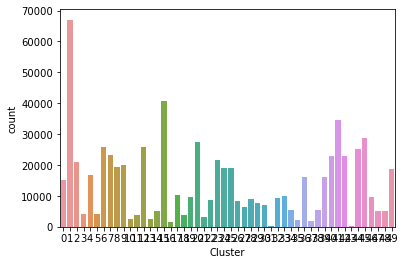

<Figure size 14400x5040 with 0 Axes>

In [18]:
import seaborn as sns
sns.countplot('Cluster', data = results)
plt.figure(figsize=(200,70)) 

In [19]:
results.loc[results['Nama Kegiatan_stem'] == '']

Akun Analisis Nama Kegiatan Nama Kegiatan_stem  \
0                                  41. PAD    pendapatan                      
1                                  41. PAD    pendapatan                      
2                                  41. PAD    pendapatan                      
3                                  41. PAD    pendapatan                      
4                                  41. PAD           non                      
...                                    ...           ...                ...   
699796  66. Pengeluaran Pembiayaan Lainnya           non                      
699797  66. Pengeluaran Pembiayaan Lainnya           non                      
699798  66. Pengeluaran Pembiayaan Lainnya           non                      
699799  66. Pengeluaran Pembiayaan Lainnya           non                      
699800  66. Pengeluaran Pembiayaan Lainnya           non                      

        Kode Pemda            Standar Pemda  Tahun  Nilai Anggaran  Cluster  
0             1.00            Provinsi Aceh   2019    1.509791e+12        1  
1             1.00            Provinsi Aceh   2019    2.886440e+10        1  
2             1.00            Provinsi Aceh   2019    1.969350e+11        1  
3             1.00            Provinsi Aceh   2019    7.460386e+11        1  
4             1.01          Kab. Aceh Barat   2019    1.630089e+10        1  
...            ...                      ...    ...             ...      ...  
699796       24.20     Kab. Manggarai Timur   2019    1.000000e+09        1  
699797       24.21         Kab. Sabu Raijua   2019    2.900000e+10        1  
699798       24.22              Kab. Malaka   2019    2.500000e+09        1  
699799       25.01  Kab. Kepulauan Tanimbar   2019    2.531600e+10        1  
699800       29.07      Kab. Belitung Timur   2019    1.040000e+09        1  

[67026 rows x 8 columns]

In [20]:
results['Nama Kegiatan_stem'] = results['Nama Kegiatan_stem'].replace([''], 'kosong')

In [21]:
results.loc[results['Cluster'] == 24][:200]

Akun Analisis                                      Nama Kegiatan  \
5839   51. Belanja Pegawai  permasyarakatan minat kebiasaan membaca mendor...   
5885   51. Belanja Pegawai   bimbingan teknis perencanaan penganggaran sd smp   
5926   51. Belanja Pegawai     manajemen pelaksanaan dak fisik sd dak reguler   
5927   51. Belanja Pegawai    manajemen pelaksanaan dak fisik skb dak reguler   
5932   51. Belanja Pegawai              manajemen pengelolaan penerimaan pdrd   
...                    ...                                                ...   
16728  51. Belanja Pegawai  survey perencanaan perbaikan kerusakan sda men...   
16729  51. Belanja Pegawai  survey perencanaan perbaikan kerusakan sda men...   
16864  51. Belanja Pegawai   monitoring peredaran obat hewan kabupaten asahan   
16932  51. Belanja Pegawai                   pelatihan dasar calon pns daerah   
16988  51. Belanja Pegawai  pembinaan pusat pendidikan wawasan kebangsaan ...   

                                      Nama Kegiatan_stem  Kode Pemda  \
5839                       minat biasa dorong wujud ajar        1.00   
5885                                       anggar sd smp        1.01   
5926                        manajemen dak sd dak reguler        1.01   
5927                       manajemen dak skb dak reguler        1.01   
5932                                      manajemen pdrd        1.01   
...                                                  ...         ...   
16728  survey baik rusa sda tunjang wadah sda upt sda...        2.00   
16729  survey baik rusa sda tunjang wadah sda upt sda...        2.00   
16864                               edar obat hewan asah        2.01   
16932                                    dasar calon pns        2.01   
16988                   didik wawas bangsa ppwk kab asah        2.01   

                 Standar Pemda  Tahun  Nilai Anggaran  Cluster  
5839             Provinsi Aceh   2019    1.360950e+09       24  
5885           Kab. Aceh Barat   2019    3.925000e+06       24  
5926           Kab. Aceh Barat   2019    1.500000e+08       24  
5927           Kab. Aceh Barat   2019    1.400000e+07       24  
5932           Kab. Aceh Barat   2019    1.138500e+08       24  
...                        ...    ...             ...      ...  
16728  Provinsi Sumatera Utara   2019    3.910000e+06       24  
16729  Provinsi Sumatera Utara   2019    1.010000e+07       24  
16864              Kab. Asahan   2019    4.000000e+05       24  
16932              Kab. Asahan   2019    1.200000e+06       24  
16988              Kab. Asahan   2019    2.600000e+07       24  

[200 rows x 8 columns]

Cluster: 0


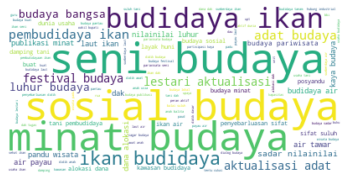

Cluster: 1


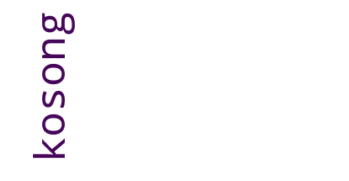

Cluster: 2


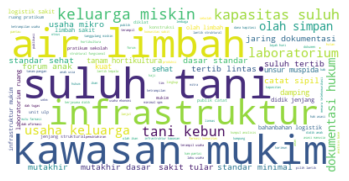

Cluster: 3


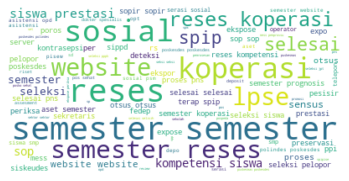

Cluster: 4


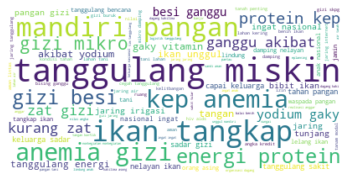

Cluster: 5


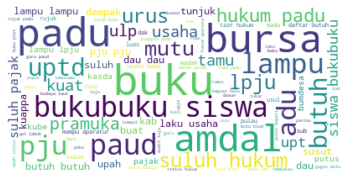

Cluster: 6


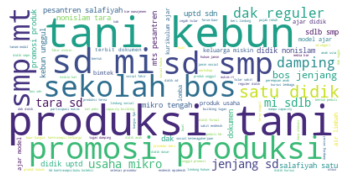

Cluster: 7


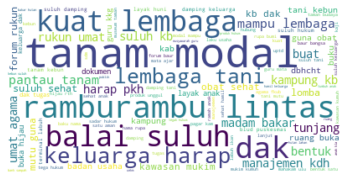

Cluster: 8


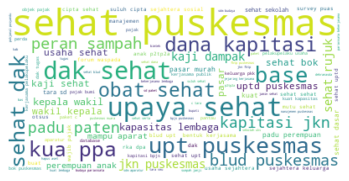

Cluster: 9


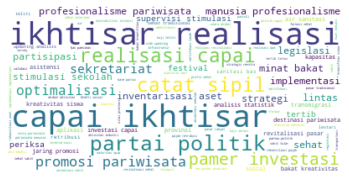

Cluster: 10


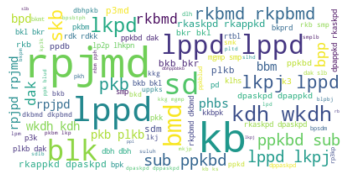

Cluster: 11


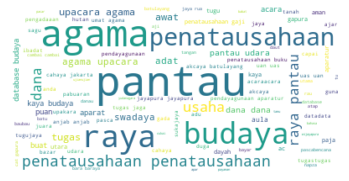

Cluster: 12


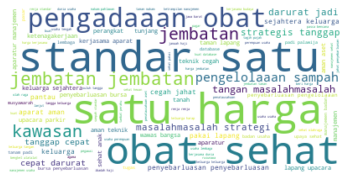

Cluster: 13


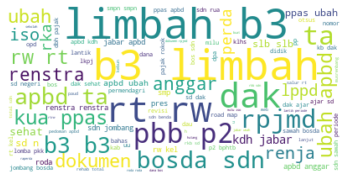

Cluster: 14


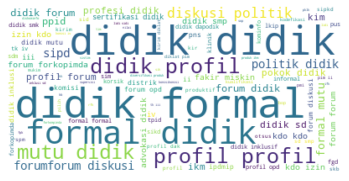

Cluster: 15


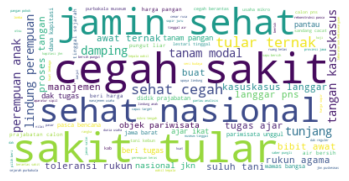

Cluster: 16


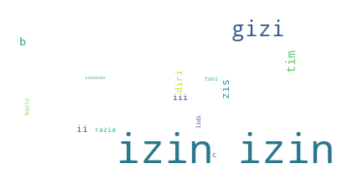

Cluster: 17


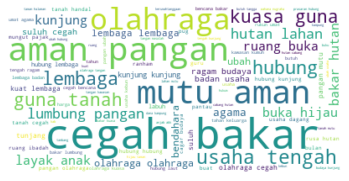

Cluster: 18


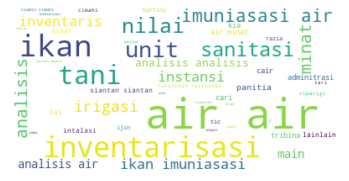

Cluster: 19


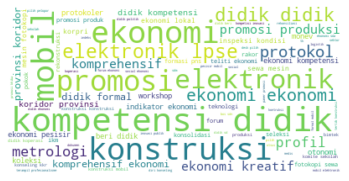

Cluster: 20


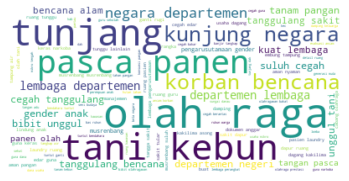

Cluster: 21


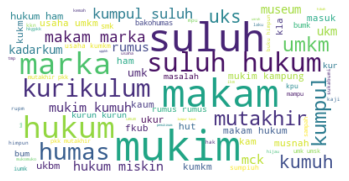

Cluster: 22


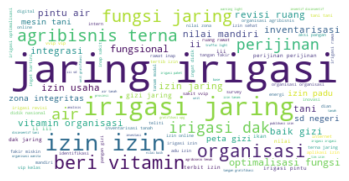

Cluster: 23


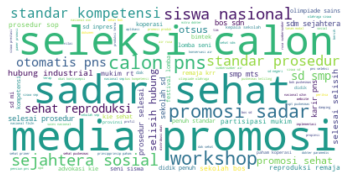

Cluster: 24


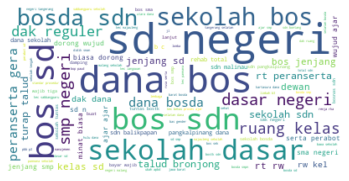

Cluster: 25


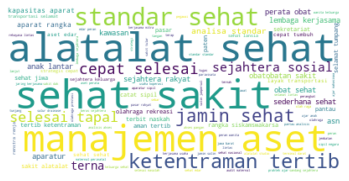

Cluster: 26


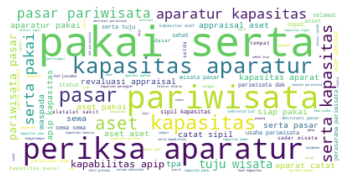

Cluster: 27


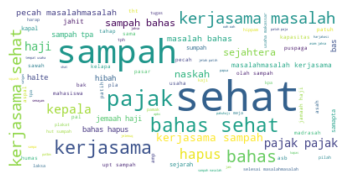

Cluster: 28


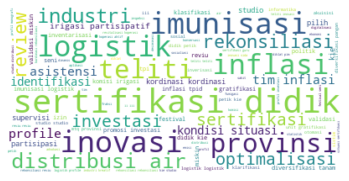

Cluster: 29


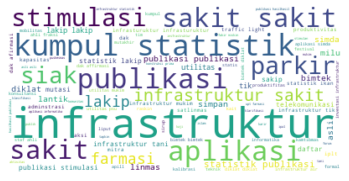

Cluster: 30


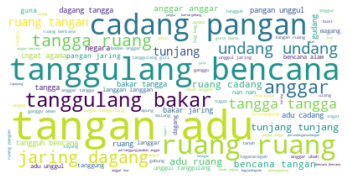

Cluster: 31


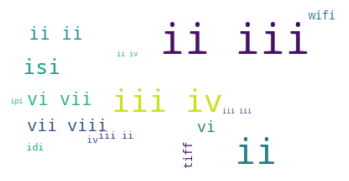

Cluster: 32


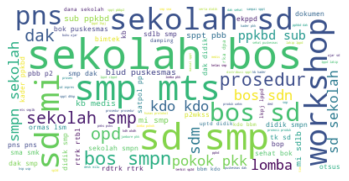

Cluster: 33


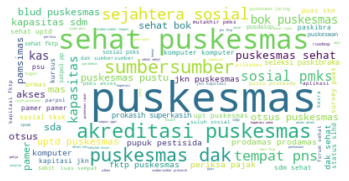

Cluster: 34


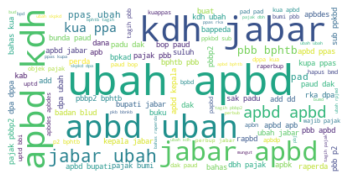

Cluster: 35


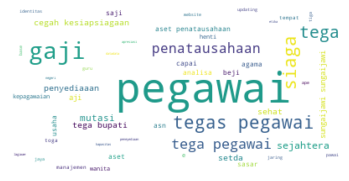

Cluster: 36


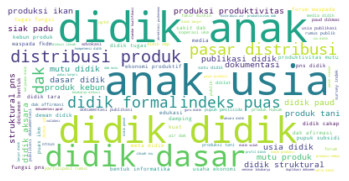

Cluster: 37


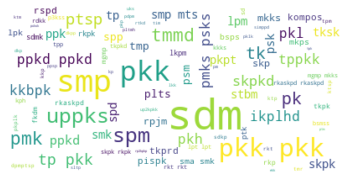

Cluster: 38


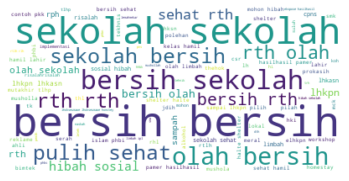

Cluster: 39


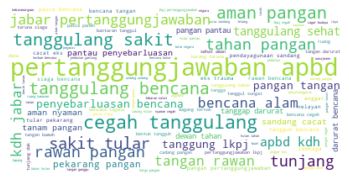

Cluster: 40


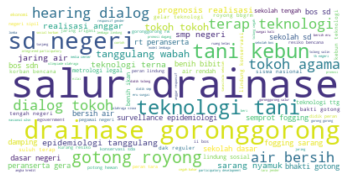

Cluster: 41


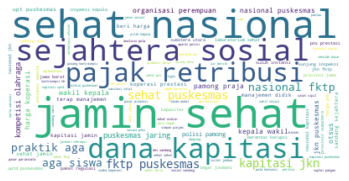

Cluster: 42


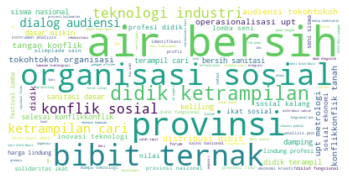

Cluster: 43


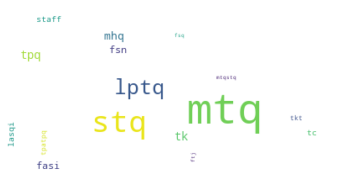

Cluster: 44


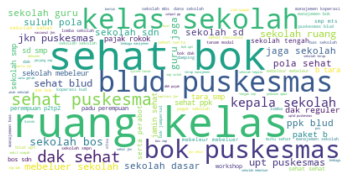

Cluster: 45


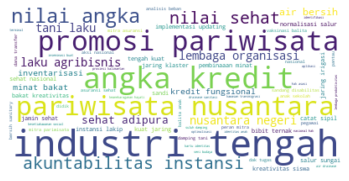

Cluster: 46


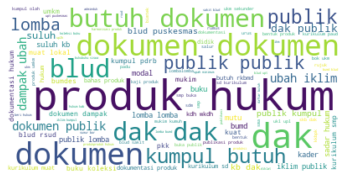

Cluster: 47


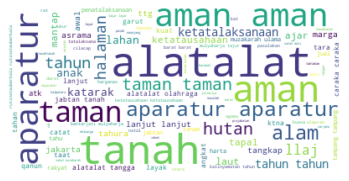

Cluster: 48


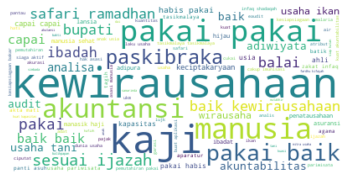

Cluster: 49


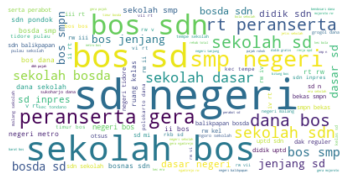

In [22]:
from wordcloud import WordCloud

result= results

for k in range(0,true_k):
   s=result[result.Cluster==k]
   text=s['Nama Kegiatan_stem'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   titles=results[results.Cluster==k]['Nama Kegiatan_stem']         
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [23]:
results.groupby(by='Cluster').sum()

Kode Pemda      Tahun  Nilai Anggaran
Cluster                                       
0         224411.32   30501033    9.937702e+12
1        1016214.35  135325494    1.769103e+15
2         312114.59   42459570    1.355005e+13
3          66320.62    8548446    3.008302e+12
4         242255.97   33604236    2.845223e+13
5          62865.55    8493933    4.100150e+12
6         391495.36   51894357    3.127248e+13
7         343389.11   46980111    1.644687e+13
8         287123.51   38970738    1.518125e+13
9         301583.38   40666698    9.494226e+12
10         38495.09    5110089    1.847291e+12
11         58719.17    7926594    3.083346e+12
12        376983.53   51902433    3.714179e+13
13         37543.57    4827429    1.668195e+12
14         80719.81   10644168    1.089238e+13
15        596670.89   82417599    2.588592e+13
16         21112.88    2834676    8.558956e+11
17        155513.12   21058170    1.119197e+13
18         57066.21    7601535    9.350173e+12
19        143410.16   19646889    5.018865e+12
20        396280.35   55383189    1.735503e+13
21         46671.52    6289185    2.236879e+12
22        119725.98   17234184    6.678656e+12
23        332836.40   43707312    1.711820e+13
24        300795.04   38675964    1.849719e+13
25        283449.24   38409456    1.843530e+13
26        124000.00   16535610    7.812748e+12
27         96683.30   13234545    1.061797e+13
28        138923.28   18241665    4.559217e+12
29        116674.54   15263640    1.167363e+13
30        103582.26   14342976    8.127669e+12
31          5261.77     706650    1.429624e+12
32        136445.54   18740358    1.431696e+13
33        151927.88   19978005    1.263331e+13
34         80814.56   10850106    2.269120e+12
35         31385.81    4241919    2.485636e+12
36        241139.19   32445330    1.370176e+13
37         30105.53    4064247    5.849447e+12
38         81971.73   10670415    7.518020e+12
39        237494.48   32503881    8.771548e+12
40        334121.30   46360278    1.520638e+13
41        520083.10   69766545    2.006388e+13
42        341155.52   46061466    1.231364e+13
43          5009.60     704631    1.703224e+11
44        371828.72   50808135    2.571271e+13
45        424813.17   58334967    1.702506e+13
46        144499.57   19675155    1.451536e+13
47         73722.00   10153551    6.266930e+12
48         77769.33   10605807    2.680116e+12
49        269157.19   37494849    1.353807e+13

In [24]:
results['Label'] = results['Cluster']

In [25]:
results

Akun Analisis Nama Kegiatan Nama Kegiatan_stem  \
0                                  41. PAD    pendapatan             kosong   
1                                  41. PAD    pendapatan             kosong   
2                                  41. PAD    pendapatan             kosong   
3                                  41. PAD    pendapatan             kosong   
4                                  41. PAD           non             kosong   
...                                    ...           ...                ...   
699796  66. Pengeluaran Pembiayaan Lainnya           non             kosong   
699797  66. Pengeluaran Pembiayaan Lainnya           non             kosong   
699798  66. Pengeluaran Pembiayaan Lainnya           non             kosong   
699799  66. Pengeluaran Pembiayaan Lainnya           non             kosong   
699800  66. Pengeluaran Pembiayaan Lainnya           non             kosong   

        Kode Pemda            Standar Pemda  Tahun  Nilai Anggaran  Cluster  \
0             1.00            Provinsi Aceh   2019    1.509791e+12        1   
1             1.00            Provinsi Aceh   2019    2.886440e+10        1   
2             1.00            Provinsi Aceh   2019    1.969350e+11        1   
3             1.00            Provinsi Aceh   2019    7.460386e+11        1   
4             1.01          Kab. Aceh Barat   2019    1.630089e+10        1   
...            ...                      ...    ...             ...      ...   
699796       24.20     Kab. Manggarai Timur   2019    1.000000e+09        1   
699797       24.21         Kab. Sabu Raijua   2019    2.900000e+10        1   
699798       24.22              Kab. Malaka   2019    2.500000e+09        1   
699799       25.01  Kab. Kepulauan Tanimbar   2019    2.531600e+10        1   
699800       29.07      Kab. Belitung Timur   2019    1.040000e+09        1   

        Label  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
699796      1  
699797      1  
699798      1  
699799      1  
699800      1  

[699801 rows x 9 columns]

In [26]:
results['Label'] = results['Label'].replace([0], 'Pariwisata')    
results['Label'] = results['Label'].replace([1], 'Lainnya')
results['Label'] = results['Label'].replace([2], 'Pertanian')
results['Label'] = results['Label'].replace([3], 'Lainnya')
results['Label'] = results['Label'].replace([4], 'Lainnya')
results['Label'] = results['Label'].replace([5], 'Lainnya')
results['Label'] = results['Label'].replace([6], 'Pertanian')
results['Label'] = results['Label'].replace([7], 'Lainnya')
results['Label'] = results['Label'].replace([8], 'Kesehatan')
results['Label'] = results['Label'].replace([9], 'Lainnya')
results['Label'] = results['Label'].replace([10], 'Lainnya')
results['Label'] = results['Label'].replace([11], 'Lainnya')
results['Label'] = results['Label'].replace([12], 'Kesehatan')
results['Label'] = results['Label'].replace([13], 'Lainnya')
results['Label'] = results['Label'].replace([14], 'Pendidikan')
results['Label'] = results['Label'].replace([15], 'Kesehatan')
results['Label'] = results['Label'].replace([16], 'Lainnya')
results['Label'] = results['Label'].replace([17], 'Lainnya')
results['Label'] = results['Label'].replace([18], 'Pertanian')
results['Label'] = results['Label'].replace([19], 'UMKM')
results['Label'] = results['Label'].replace([20], 'Pertanian')
results['Label'] = results['Label'].replace([21], 'Lainnya')
results['Label'] = results['Label'].replace([22], 'Pertanian')
results['Label'] = results['Label'].replace([23], 'Lainnya')
results['Label'] = results['Label'].replace([24], 'Pendidikan')
results['Label'] = results['Label'].replace([25], 'Kesehatan')
results['Label'] = results['Label'].replace([26], 'Pariwisata')
results['Label'] = results['Label'].replace([27], 'Lainnya')
results['Label'] = results['Label'].replace([28], 'Lainnya')
results['Label'] = results['Label'].replace([29], 'Lainnya')
results['Label'] = results['Label'].replace([30], 'Lainnya')
results['Label'] = results['Label'].replace([31], 'Lainnya')
results['Label'] = results['Label'].replace([32], 'Pendidikan')
results['Label'] = results['Label'].replace([33], 'Kesehatan')
results['Label'] = results['Label'].replace([34], 'Lainnya')
results['Label'] = results['Label'].replace([35], 'Lainnya')
results['Label'] = results['Label'].replace([36], 'Lainnya')
results['Label'] = results['Label'].replace([37], 'Lainnya')
results['Label'] = results['Label'].replace([38], 'Kesehatan')
results['Label'] = results['Label'].replace([39], 'Lainnya')
results['Label'] = results['Label'].replace([40], 'Pertanian')
results['Label'] = results['Label'].replace([41], 'Kesehatan')
results['Label'] = results['Label'].replace([42], 'Pertanian')
results['Label'] = results['Label'].replace([43], 'Lainnya')
results['Label'] = results['Label'].replace([44], 'Kesehatan')
results['Label'] = results['Label'].replace([45], 'Pariwisata')
results['Label'] = results['Label'].replace([46], 'Lainnya')
results['Label'] = results['Label'].replace([47], 'Pertanian')
results['Label'] = results['Label'].replace([48], 'UMKM')
results['Label'] = results['Label'].replace([49], 'Pendidikan')

In [27]:
results.groupby(by='Label').sum()

Kode Pemda      Tahun  Nilai Anggaran  Cluster
Label                                                     
Kesehatan   2670038.60  362923326    1.625722e+14  4602195
Lainnya     3955094.62  531647118    1.952778e+15  4247737
Pariwisata   773224.49  105371610    3.477551e+13  1513125
Pendidikan   787117.58  105555339    5.724460e+13  1740555
Pertanian   2025681.31  277148130    1.119933e+14  3113491
UMKM         221179.49   30252696    7.698981e+12   437033

In [28]:
results.to_excel('Data_APBD_2019.xlsx')